<a href="https://colab.research.google.com/github/Monisha-204/DesignThinking.github.io/blob/main/Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
image_size = [224, 224]
train_path = '/content/drive/MyDrive/Disease Predicton/Train'
valid_path = '/content/drive/MyDrive/Disease Predicton/Valid'

In [ ]:
inception = InceptionV3(input_shape=image_size + [3],
                        weights='imagenet',
                        include_top=False)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Disease Predicton/Train/*')
folders

['/content/drive/MyDrive/Disease Predicton/Train/Yellow_rust',
 '/content/drive/MyDrive/Disease Predicton/Train/Root_rot',
 '/content/drive/MyDrive/Disease Predicton/Train/Healthy',
 '/content/drive/MyDrive/Disease Predicton/Train/Mildew',
 '/content/drive/MyDrive/Disease Predicton/Train/Brown_spot',
 '/content/drive/MyDrive/Disease Predicton/Train/Blight',
 '/content/drive/MyDrive/Disease Predicton/Train/Black_rust']

In [ ]:
x = Flatten()(inception.output)

prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 22,161,191 (84.54 MB)

 Trainable params: 358,407 (1.37 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Disease Predicton/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/Disease Predicton/Valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

print(len(training_set))
print(len(validation_set))

Found 3647 images belonging to 7 classes.
Found 499 images belonging to 7 classes.
114
16


In [ ]:
r = model.fit(
  training_set,
  validation_data=validation_set,
  batch_size = 16,
  epochs = 10,
  validation_batch_size = 16
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 616s 5s/step - accuracy: 0.7368 - loss: 1.8196 - val_accuracy: 0.6914 - val_loss: 2.5902
Epoch 2/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 607s 5s/step - accuracy: 0.7940 - loss: 1.2999 - val_accuracy: 0.6453 - val_loss: 3.6834
Epoch 3/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 628s 5s/step - accuracy: 0.7921 - loss: 1.5449 - val_accuracy: 0.6954 - val_loss: 2.9469
Epoch 4/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 611s 5s/step - accuracy: 0.8464 - loss: 1.1728 - val_accuracy: 0.7495 - val_loss: 2.8653
Epoch 5/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 628s 5s/step - accuracy: 0.8613 - loss: 1.1157 - val_accuracy: 0.6593 - val_loss: 5.4276
Epoch 6/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 622s 5s/step - accuracy: 0.8317 - loss: 1.3248 - val_accuracy: 0.7375 - val_loss: 3.4330
Epoch 7/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 662s 5s/step - accuracy: 0.8782 - loss: 1.0651 - val_accuracy: 0.7295 - val_loss: 4.0841
Epoch 8/10
114/114 ━━━━━━━━━━━━━━━━━━━━ 626s 5s/step - accuracy: 0.8770 - loss: 1.0695 - val_accuracy: 0.725

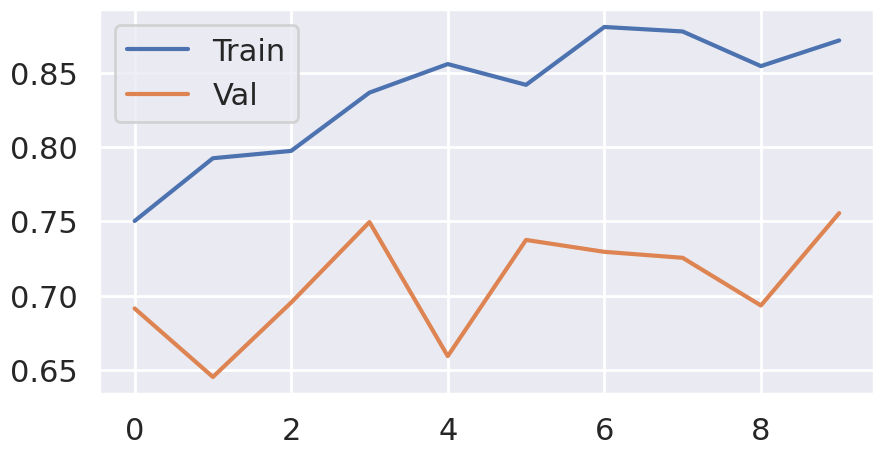

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

sns.set_theme()
sns.set_context("poster")
figure(figsize=(10, 5), dpi=100)

plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend(['Train', 'Val'], loc= 'upper left')
plt.show()


In [ ]:
model.save('Wheat_model_3.keras')

from google.colab import files

# Download the model file
files.download('Wheat_model_3.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    x= img_to_array(img)
    x= np.expand_dims(x, axis=0)
    x= x/255.0
    return x

img_path = '/content/drive/MyDrive/Disease Predicton/Test/Root_rot_test/common_root_rot_112.png'
x= preprocess_image(img_path)

predictions = model.predict(x)
print(predictions[0])

labels = training_set.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

predicted_label = labels[np.argmax(predictions[0])]
predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
[2.5912320e-37 0.0000000e+00 1.4678376e-35 8.6166880e-32 1.3622517e-23
 1.0000000e+00 1.3350941e-37]
{0: 'Black_rust', 1: 'Blight', 2: 'Brown_spot', 3: 'Healthy', 4: 'Mildew', 5: 'Root_rot', 6: 'Yellow_rust'}


'Root_rot'